<a href="https://colab.research.google.com/github/09gauravbisht/Customer-Segmentation-Unsupervised-ML-Model/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.


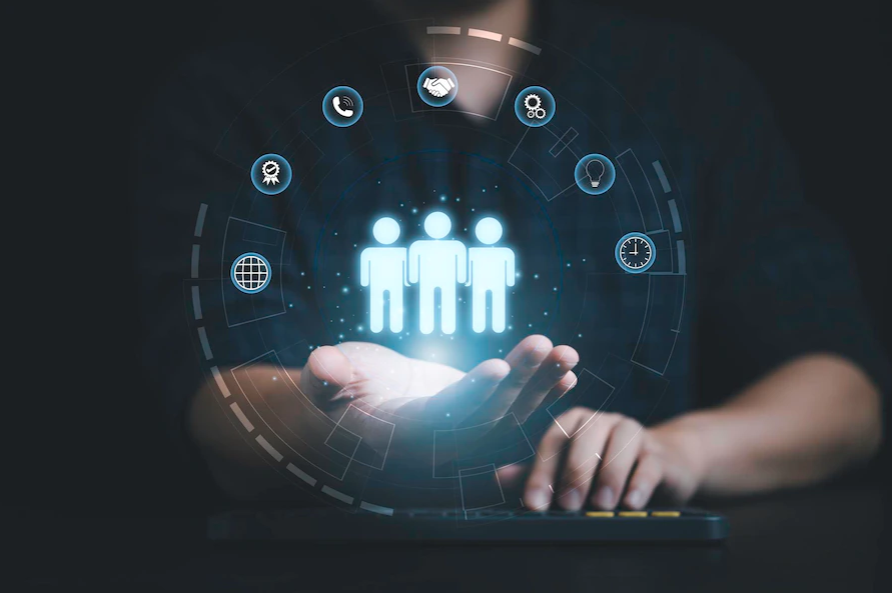

# **Importing Libraries**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import datetime
import scipy
import scipy.stats as stat
import math
import sklearn

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Libraries for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree



# **Importing Dataset**


In [4]:
# Mounting Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading Dataset
df = pd.read_excel('/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECTS/CAPSTONE PROJECT 4 - Customer Segmentation/Online Retail.xlsx')

In [6]:
# First Look Of Dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [8]:
df.shape

(541909, 8)

In [9]:
df.describe(include="all")

<ipython-input-9-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [10]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [13]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

#**Exploratory Data Analysis (EDA)**


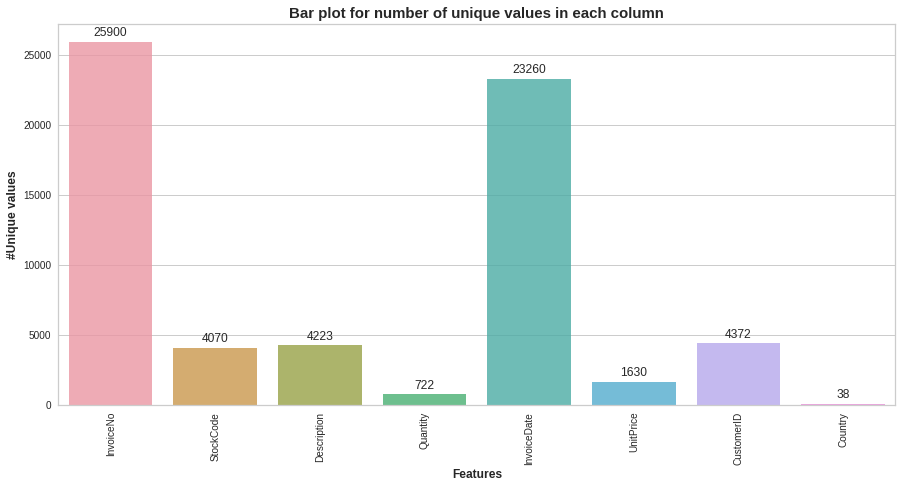

In [14]:
# Plotting bar plot for number of unique values in each column
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

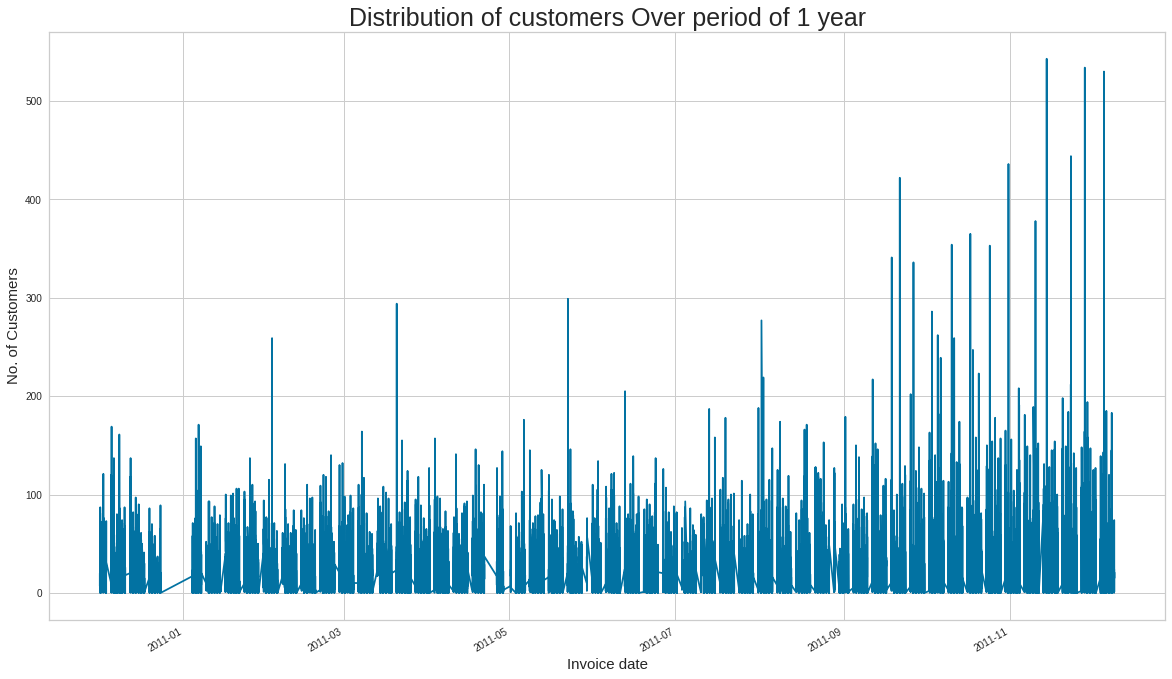

In [15]:
## customer distribution in 1 year time period
plt.figure(figsize=(20,12))
customer_distribution = df.groupby('InvoiceDate').count()['CustomerID'].plot()

## Set title and x, y labels
plt.title('Distribution of customers Over period of 1 year', size=25)
plt.xlabel('Invoice date', size=15)
plt.ylabel('No. of Customers', size=15)
plt.show()

# **Checking & Dropping Duplicates**


In [16]:
#Checking duplicate values
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

In [17]:
# Dropping Duplicate Rows
df.drop_duplicates(keep = False, inplace=True)

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
df.shape

(531762, 8)

### **After dropping duplicates we can see that 10147 values got dropped which is nearly about 2% of the original dataset.**




# **Countries**


**Here, we will quickly look at the countries from which orders were made:**

In [20]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('No. of countries in the dataframe: {}'.format(len(countries)))

No. of countries in the dataframe: 37


\[# **Different country count on the basis of Invoice no.**


In [21]:
# Apply groupby function on country and Invoice No.
country_count = df.groupby('Country')['InvoiceNo'].count().reset_index()

In [22]:
country_count.head()

,Country,InvoiceNo
0,Australia,1257
1,Austria,401
2,Bahrain,19
3,Belgium,2069
4,Brazil,32


In [23]:
## From country_count variable finding top 10 countries
Top_10_country = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)
Top_10_country

,Country,InvoiceNo
0,United Kingdom,485509
1,Germany,9465
2,France,8525
3,EIRE,8172
4,Spain,2523
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1986
8,Portugal,1502
9,Australia,1257


In [24]:
## Adding country percentage column to top 10 countries data frame
Top_10_country['Country_percent']= Top_10_country['InvoiceNo']*100/df['InvoiceNo'].count()
Top_10_country

,Country,InvoiceNo,Country_percent
0,United Kingdom,485509,91.301936
1,Germany,9465,1.779932
2,France,8525,1.603161
3,EIRE,8172,1.536778
4,Spain,2523,0.474460
5,Netherlands,2371,0.445876
6,Belgium,2069,0.389084
7,Switzerland,1986,0.373475
8,Portugal,1502,0.282457
9,Australia,1257,0.236384


### **Plotting graph for top 10 countries on the basis of percentage count.**


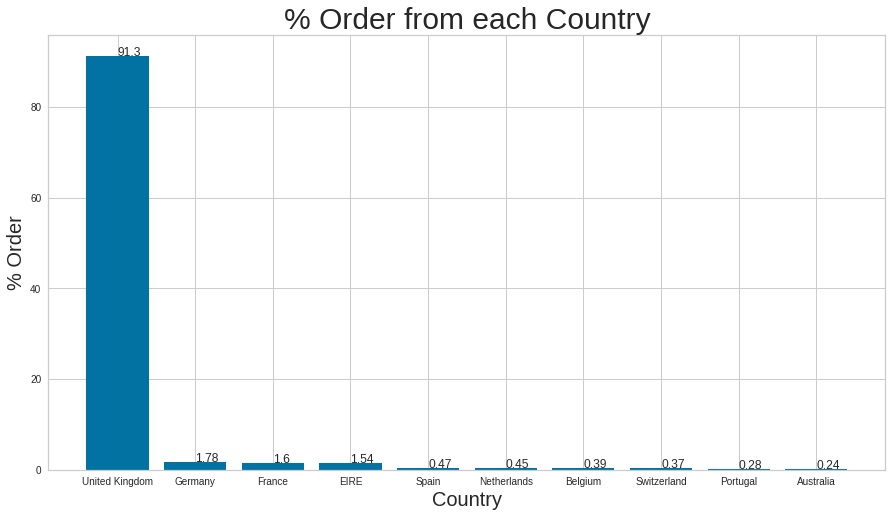

In [25]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=Top_10_country['Country']
y=Top_10_country['Country_percent']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("% Order", size=20)
plt.title("% Order from each Country", size=30)

## Showing the plot
plt.show()

## **We see that the dataset is largely dominated by orders made from the UK which is about 91.3%.**


# **Checking for cancelled orders**

**Given in the attribute info of data descripton**

**InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.** 

**Let us now look at the number of cancelled orders in the dataset.**


In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [27]:
# String to be searched in start of string 
search ="C"
  
# boolean series returned with False at place of NaN
series = df["InvoiceNo"].str.startswith(search, na=False)
  
# displaying filtered dataframe
cancel_order = df[series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [28]:
# Checking the shape of the cancelled order dataset
cancel_order.shape

(9219, 8)

In [29]:
# Checking the percentage of no. of orders cancelled 
cancel_percentage = cancel_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancel_percentage

1.7336703261985624

### This shows that **9219 (approx 1.73%)** were such orders which was **cancelled**.


### **Now checking the top 10 countries from where the orders were cancelled.**


In [30]:
cancel = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()

In [31]:
cancel_top10 = cancel.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_top10

,Country,InvoiceNo
0,United Kingdom,7791
1,Germany,453
2,EIRE,300
3,France,147
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


**Most orders are cancelled from U.K followed by Germany & EIRE**


### **Now plotting a graph for these top 10 countries on the basis of no. of cancelled orders.**


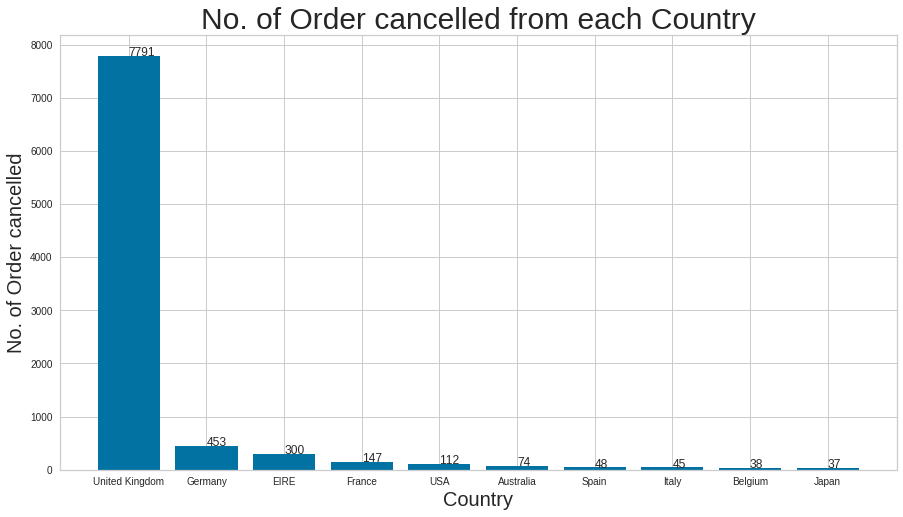

In [32]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancel_top10['Country']
y=cancel_top10['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

# **Top 10 Products**


In [33]:
# Creating customer dataframe copy
customer_df = df.copy()

In [34]:

customer_df['amount'] = customer_df.Quantity*customer_df.UnitPrice

In [35]:
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


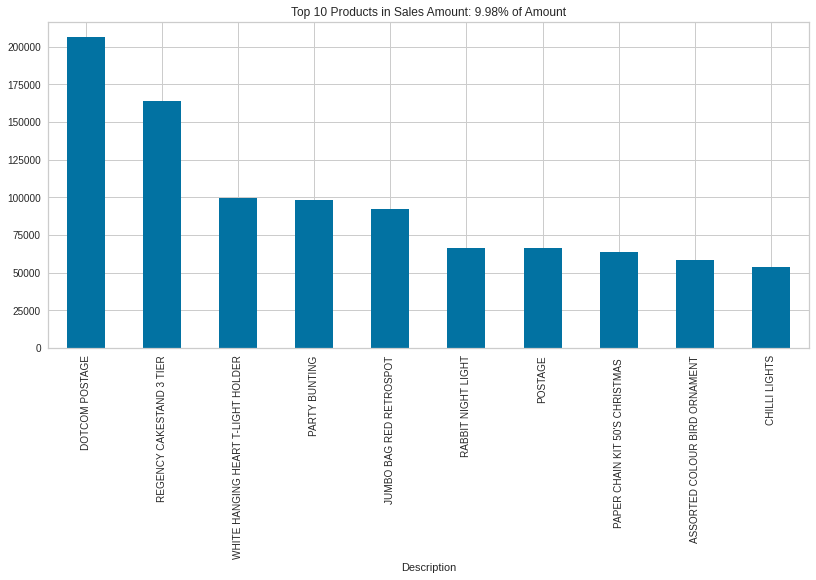

In [36]:
# Plotting a graph for top 10 products
AmoutSum = customer_df.groupby(["Description"]).amount.sum().sort_values(ascending = False)
inv = customer_df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)

fig = plt.figure(figsize=(30, 6))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)

g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount'.\
                       format(PercentSales))

# **Customer's Data**


In [37]:
#fig = plt.figure(figsize=(25, 7))
PercentSales = customer_df.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False).iloc[:20].reset_index()
PercentSales.head(10)


,CustomerID,amount
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187162.17
3,14911.0,132344.84
4,12415.0,123725.45
5,14156.0,113045.04
6,17511.0,88125.38
7,16684.0,65892.08
8,13694.0,62727.98
9,15311.0,59149.04


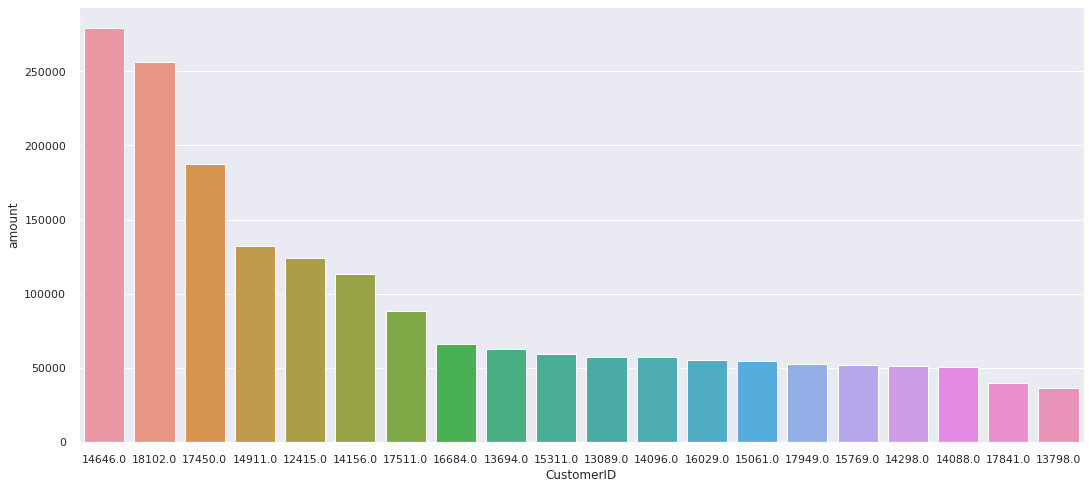

In [38]:
sns.set(rc={'figure.figsize':(18,8)})


sns.barplot(x="CustomerID", y="amount", data=PercentSales, order=PercentSales['CustomerID'])






##**Checking orders with negative quantities that were not canceled.**


In [39]:
df_negative_qty = df[df['Quantity'] < 0]
df_negative_qty.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


**As we can see from the above figure, these cases are the ones where 
CustomerID values are NaNs. These cases were also removed from the data.**

In [40]:
df_negative_qty.shape

(10555, 8)

**So, there is 10555 rows having negative quantity and also order were not canceled.**

**Also we see that, these cases are the ones where CustomerID values are NaNs. These cases were also removed from the data.**


In [41]:
# Checking for NaN Values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134995
Country             0
dtype: int64

**Customer ID has 134995 Nan Values. And Description has 1454 Nan Values. Drop the Nan values to make data more cleaned.**


In [42]:
df.dropna(inplace=True)

In [43]:
df.shape

(396767, 8)

In [44]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [45]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,396767.000000,396767.000000,396767.000000
mean,12.298913,3.487053,15275.108517
std,251.781170,70.187448,1714.401947
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13919.000000
50%,5.000000,1.950000,15132.000000
75%,12.000000,3.750000,16779.000000
max,80995.000000,38970.000000,18287.000000


# **RFM model (Recency, Frequency,Monetary value)**

### **Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on**

##**Performing RFM Segmentation and RFM Analysis, Step by Step**


The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ... The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).


###**Recency**

To create a Recency feature variable, we need to decide the reference date for analysis and we wil define the reference date as one day before the last transaction.

In [46]:
ref_date = df.InvoiceDate.max()

#timedelta function returns to total number of seconds
ref_date = ref_date + datetime.timedelta(days=1)

print(df.InvoiceDate.max(), df.InvoiceDate.min())
ref_date

2011-12-09 12:50:00 2010-12-01 08:26:00


Timestamp('2011-12-10 12:50:00')

We will construct a reference variable as number of days before the reference date when a customer last made a purchase.

In [47]:
df['days_since_last_purchase'] = ref_date- df.InvoiceDate
df['days_since_last_purchase_num'] = df['days_since_last_purchase'].astype('timedelta64[D]')
df['days_since_last_purchase_num'].head() 

0    374.0
1    374.0
2    374.0
3    374.0
4    374.0
Name: days_since_last_purchase_num, dtype: float64

In [48]:
customer_history_df = df.groupby('CustomerID')['days_since_last_purchase_num'].min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
customer_history_df.head()

,CustomerID,Recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


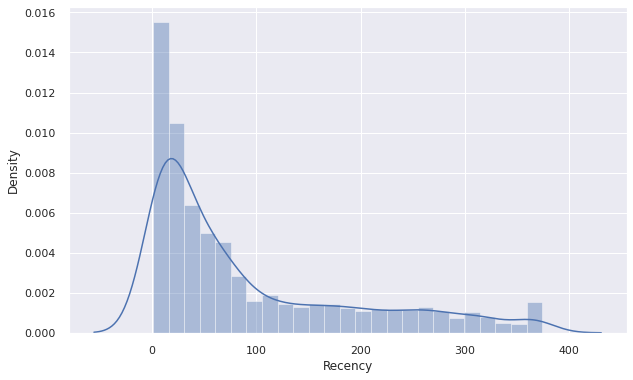

In [49]:
#Recency distribution plot
import seaborn as sns
x =customer_history_df['Recency']
plt.figure(figsize=(10,6))
sns.distplot(x)

In [50]:
customer_history_df.describe()

,CustomerID,Recency
count,4372.000000,4372.000000
mean,15299.677722,92.047118
std,1722.390705,100.765435
min,12346.000000,1.000000
25%,13812.750000,17.000000
50%,15300.500000,50.000000
75%,16778.250000,143.000000
max,18287.000000,374.000000


###**Frequency and Monetary value**


In [51]:
df['Monetary'] = df['Quantity']*df['UnitPrice']

In [52]:
customer_monetary_val = df[['CustomerID','Monetary']].groupby('CustomerID').sum().reset_index()
customer_monetary_val.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


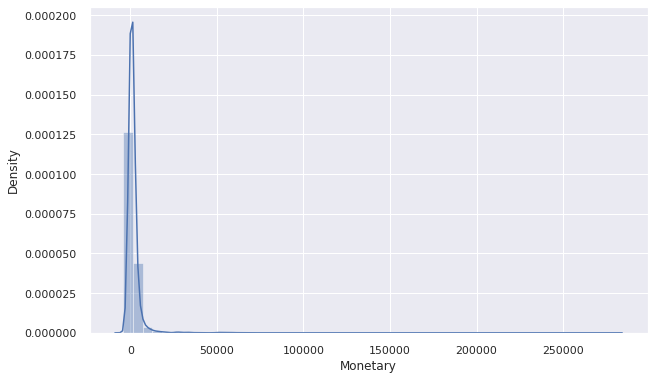

In [53]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = customer_monetary_val['Monetary']
plt.figure(figsize=(10,6))
sns.distplot(x)

In [54]:
customer_history_df=customer_history_df.merge(customer_monetary_val,how='outer')
customer_history_df.head()

,CustomerID,Recency,Monetary
0,12346.0,326.0,0.00
1,12347.0,2.0,4310.00
2,12348.0,75.0,1797.24
3,12349.0,19.0,1757.55
4,12350.0,310.0,334.40


In [55]:
customer_freq = df[['CustomerID','Monetary']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Monetary':'Frequency'},inplace=True)
customer_freq.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


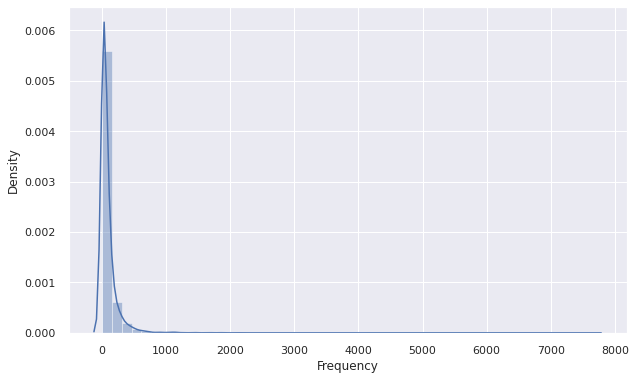

In [56]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = customer_freq['Frequency']
plt.figure(figsize=(10,6))
sns.distplot(x)

In [57]:
customer_history_df=customer_history_df.merge(customer_freq,how='outer')
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,326.0,0.00,2
1,12347.0,2.0,4310.00,182
2,12348.0,75.0,1797.24,31
3,12349.0,19.0,1757.55,73
4,12350.0,310.0,334.40,17


In [58]:
customer_history_df.Monetary[customer_history_df.Monetary<=0].count()

50

In [59]:
customer_history_df = customer_history_df[customer_history_df.Monetary != 0]

# **Outlier Treatment**

**Box plot**


### Checking outliers by plotting Box Plot for R F M (Recency, Frequency & Monetary).

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 0, 'Attribute - Recency')

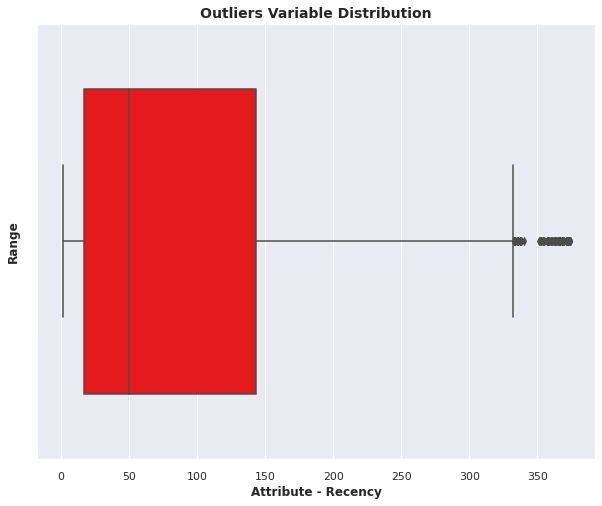

In [60]:
# Box plot of Recency
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(x = customer_history_df['Recency'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Recency", fontweight = 'bold')

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 0, 'Attribute - Monetary')

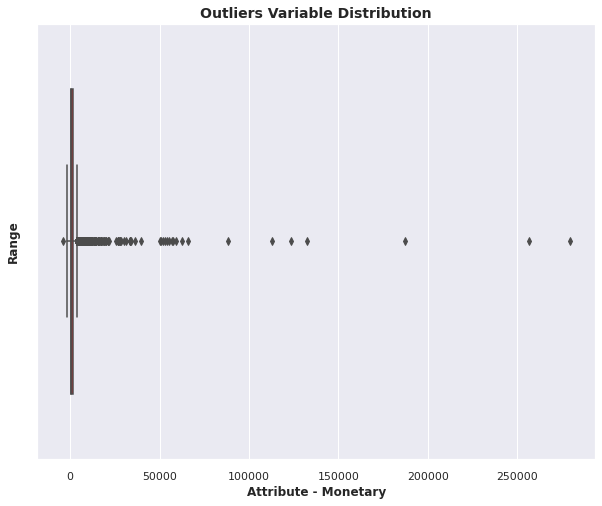

In [61]:
# Box plot of Monetary
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(x = customer_history_df['Monetary'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Monetary", fontweight = 'bold')

/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 0, 'Attribute - Frequency')

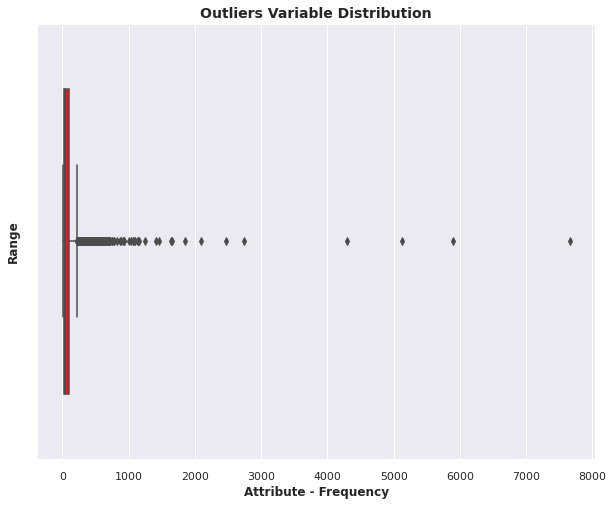

In [62]:
# Box plot of Frequency
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(x = customer_history_df['Frequency'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Frequency", fontweight = 'bold')

**Removing Outliers by using IQR process**


In [63]:
# removing (statistical) outliers
Q1 = customer_history_df.Monetary.quantile(0.05)
Q3 = customer_history_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Monetary >= Q1 - 1.5*IQR) & (customer_history_df.Monetary <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = customer_history_df.Recency.quantile(0.05)
Q3 = customer_history_df.Recency.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Recency >= Q1 - 1.5*IQR) & (customer_history_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = customer_history_df.Frequency.quantile(0.05)
Q3 = customer_history_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Frequency >= Q1 - 1.5*IQR) & (customer_history_df.Frequency <= Q3 + 1.5*IQR)]

In [64]:
# Rescaling
rfm_df = customer_history_df[['Monetary', 'Frequency', 'Recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4287, 3)

In [65]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,1.738183,1.081597,-0.906060
1,0.303827,-0.457858,-0.183284
2,0.281170,-0.029665,-0.737742
3,-0.531205,-0.600589,2.143462
4,0.160075,0.194627,-0.569425


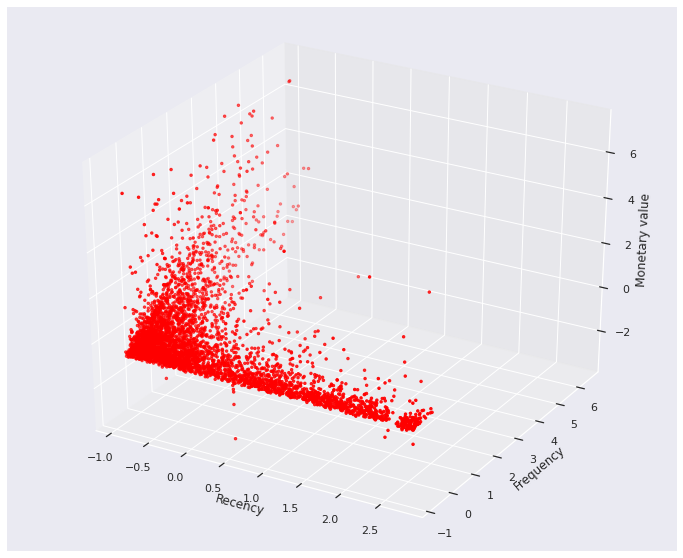

In [66]:
# Importing Library for 3D plot
from mpl_toolkits.mplot3d import Axes3D

# set fig size
fig=plt.figure(figsize=(12,10))

# syntax for 3-D plotting
ax=fig.add_subplot(111,projection='3d')

# syntax for plotting
xs = rfm_df_scaled.Recency
ys = rfm_df_scaled.Frequency
zs = rfm_df_scaled.Monetary
ax.scatter(xs,ys,zs,s=6, color='red') 

# set x, y & z label
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')

# show the plot
plt.show()

# **Modelling**

**Silhouette analysis on K-Means Clustering**

Silhouette analysis can be used to study the separation distance between the resulting clusters, as a strategy to quantifying the quality of clustering via graphical tool to plot a measure of how tightly grouped the samples in the clusters are. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

Let's see below how our data perform for each K clusters groups (3, 5 and 7) in the silhouette score of each cluster, along with the center of each of the cluster discovered in the scatter plots, by amount_log vs recency_log and vs frequency_log.

**Silhouette Analysis**

**silhouette score** = (p-q)/max(p,q)

**p** is the mean distance to the points in the nearest cluster that the data point is not a part of

**q** is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

**A** score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7effdc1be7c0>,
                     estimator=KMeans(n_clusters=3))

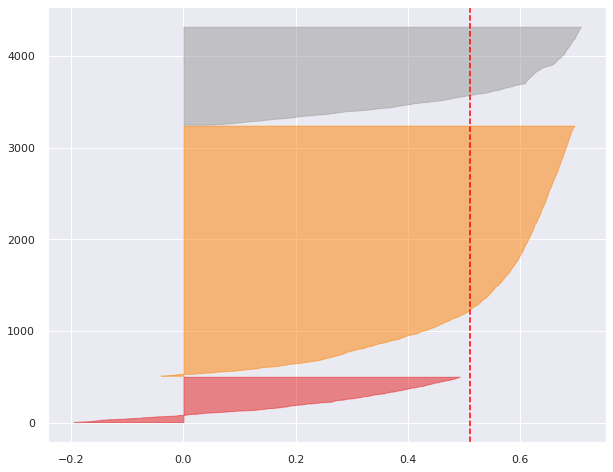

In [67]:
silhouette_model = SilhouetteVisualizer(KMeans(3))
silhouette_model.fit(rfm_df_scaled)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7effdae6f1c0>,
                     estimator=KMeans(n_clusters=4))

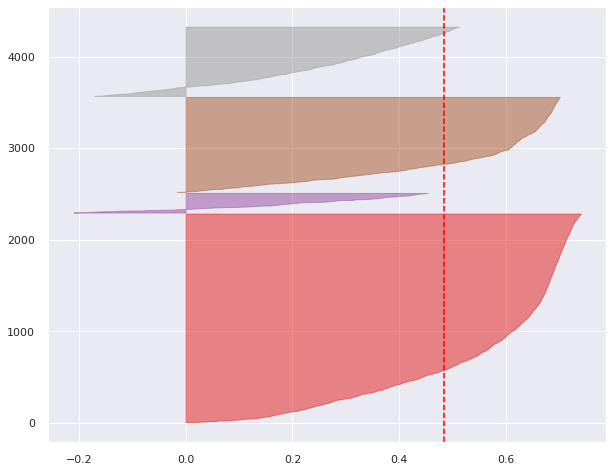

In [68]:
silhouette_model = SilhouetteVisualizer(KMeans(4))
silhouette_model.fit(rfm_df_scaled)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7effe2d2dbe0>,
                     estimator=KMeans(n_clusters=5))

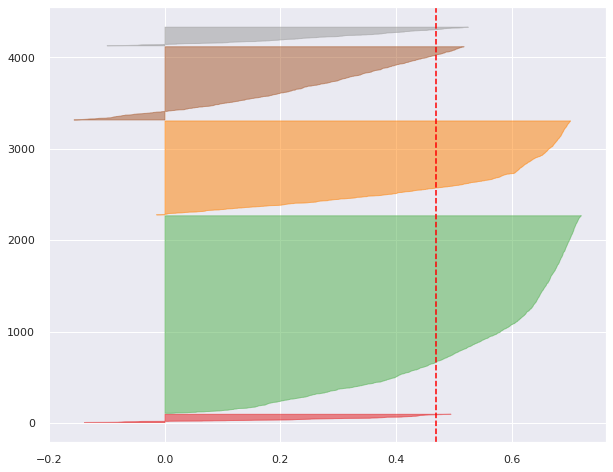

In [69]:
silhouette_model = SilhouetteVisualizer(KMeans(5))
silhouette_model.fit(rfm_df_scaled)

# **Finding best value for K**

**The Elbow Method**


Using the elbow method to find the optimal number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to.




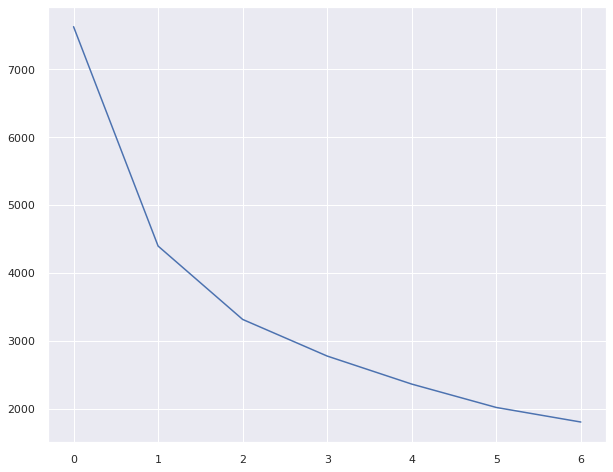

In [70]:
# elbow-curve/SSD
elbow_curve = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8] 
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    elbow_curve.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(elbow_curve)

In [71]:
# silhouette analysis
i = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in i:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5460618631425428
For n_clusters=3, the silhouette score is 0.5101666179333405
For n_clusters=4, the silhouette score is 0.482635577783936
For n_clusters=5, the silhouette score is 0.4683258592852992
For n_clusters=6, the silhouette score is 0.4194176688276837
For n_clusters=7, the silhouette score is 0.4196604524700403
For n_clusters=8, the silhouette score is 0.4147858707497803


In [72]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [77]:
kmeans.labels_

array([0, 2, 2, ..., 2, 0, 2], dtype=int32)

In [78]:
# assign the label
customer_history_df['cluster_id'] = kmeans.labels_
customer_history_df.head()


,CustomerID,Recency,Monetary,Frequency,cluster_id
1,12347.0,2.0,4310.00,182,0
2,12348.0,75.0,1797.24,31,2
3,12349.0,19.0,1757.55,73,2
4,12350.0,310.0,334.40,17,1
5,12352.0,36.0,1545.41,95,2


##**Creating Box Plot for R-M-F with respect to Cluster_id.**

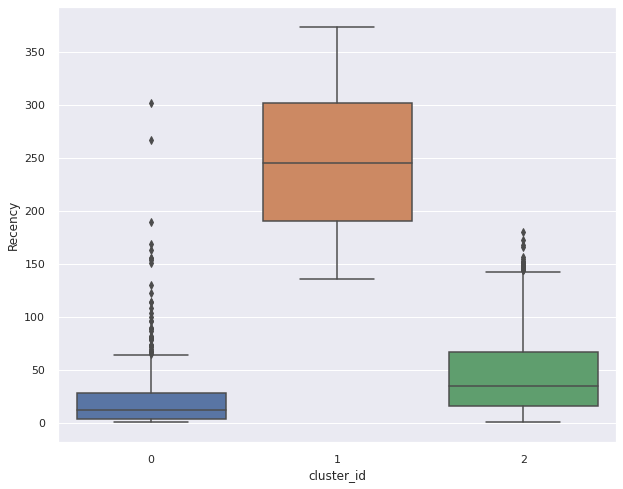

In [79]:
# plot
sns.boxplot(x='cluster_id', y='Recency', data=customer_history_df)

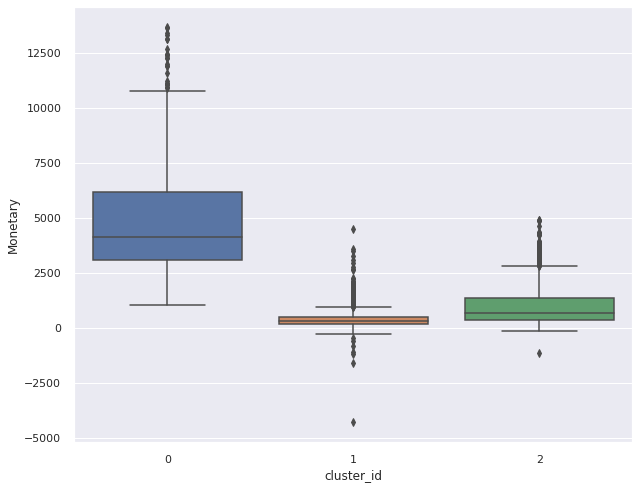

In [80]:
# plot
sns.boxplot(x='cluster_id', y='Monetary', data=customer_history_df)

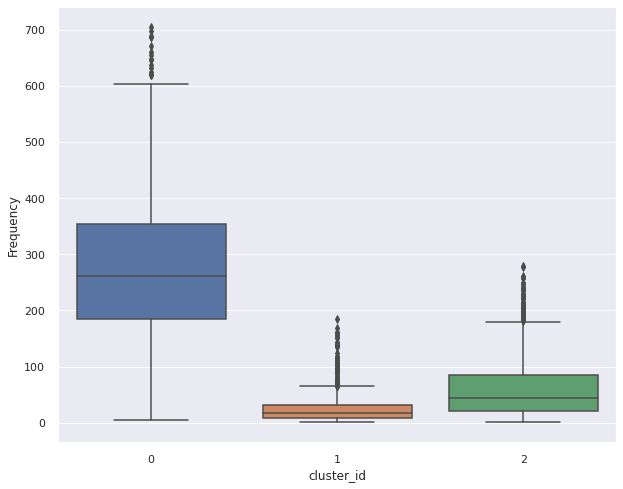

In [81]:
# plot
sns.boxplot(x='cluster_id', y='Frequency', data=customer_history_df)